<a href="https://colab.research.google.com/github/trishaa4144/cmsc320-final/blob/main/CMSC320_Checkpt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd

In [190]:
income_df = pd.read_csv("us_income_zipcode.csv")
zipcode_borough = pd.read_csv("New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv")
df = pd.read_csv("Rat_Sightings_20240917.csv", low_memory=False)

In [191]:
### Dropping all margin of error columns
def drop_margin_cols():
    lst = income_df.columns
    remove_list = []

    for col in lst:
        if "Margin of Error" in col:
            remove_list.append(col)
    return remove_list

lst = drop_margin_cols()
income_df.drop(lst, axis=1, inplace=True)
income_df

,ZIP,Geography,Geographic Area Name,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999",...,"Nonfamily Households $35,000 to $49,999","Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,...,3.6,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,...,6.0,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,...,4.4,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,...,4.6,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,...,7.0,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364993,99923,8600000US99923,ZCTA5 99923,62.0,0.0,6.5,43.5,0.0,33.9,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,18155.0,17603.0,0.0,2011.0
364994,99925,8600000US99925,ZCTA5 99925,345.0,2.0,4.9,18.0,12.2,13.9,22.3,...,10.9,26.1,0.7,8.7,2.9,0.0,33750.0,45545.0,14.5,2011.0
364995,99926,8600000US99926,ZCTA5 99926,577.0,2.9,6.9,15.4,6.1,28.8,17.0,...,22.4,16.0,0.0,0.0,3.2,0.0,22083.0,34028.0,8.3,2011.0
364996,99927,8600000US99927,ZCTA5 99927,43.0,20.9,27.9,20.9,23.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12813.0,NaN,42.9,2011.0


In [192]:
income_df.drop(["Geography", "Geographic Area Name"], axis=1, inplace=True)
income_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $35,000 to $49,999","Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,0.7,0.9,...,3.6,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021.0
1,602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,3.3,2.0,...,6.0,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021.0
2,603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,4.1,2.5,...,4.4,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021.0
3,606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,0.7,0.3,...,4.6,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021.0
4,610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,3.4,1.7,...,7.0,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364993,99923,62.0,0.0,6.5,43.5,0.0,33.9,16.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18155.0,17603.0,0.0,2011.0
364994,99925,345.0,2.0,4.9,18.0,12.2,13.9,22.3,6.4,18.0,...,10.9,26.1,0.7,8.7,2.9,0.0,33750.0,45545.0,14.5,2011.0
364995,99926,577.0,2.9,6.9,15.4,6.1,28.8,17.0,10.4,8.0,...,22.4,16.0,0.0,0.0,3.2,0.0,22083.0,34028.0,8.3,2011.0
364996,99927,43.0,20.9,27.9,20.9,23.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12813.0,NaN,42.9,2011.0


In [193]:
#Dropping columns we don't need from borough df
zipcode_borough.drop(["State FIPS", "County Code", "File Date", "County FIPS"], axis=1, inplace=True)
zipcode_borough

,County Name,ZIP Code
0,Albany,12007
1,Albany,12009
2,Albany,12023
3,Albany,12041
4,Albany,12045
...,...,...
2538,Yates,14561
2539,Yates,14837
2540,Yates,14842
2541,Yates,14857


In [194]:
# Keep only the necessary columns
df = df[['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude']]

# Drop rows with unspecified boroughs
df = df[df['Borough'] != 'Unspecified']
df.reset_index(drop=True, inplace=True)

df.dropna(subset=['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude'], inplace=True)

# Get unique values in 'Location Type'
unique_location_types = df['Location Type'].unique()

# Define mapping for residential categories
residential_mapping = {
    'Single Room Occupancy (SRO)': 'Single',
    '1-2 Family Dwelling': '1-2 Family Apartment',
    '1-2 FamilyDwelling': '1-2 Family Apartment',
    '3+ Family Apt. Building': '3+ Family',
    '3+ Family Apartment Building': '3+ Family',
    '3+ Family Apt.': '3+ Family',
    '3+Family Apt.': '3+ Family',
    '3+ Family Apt': '3+ Family',
    '1-3 Family Dwelling': '1-3 Family Dwelling',
    '1-3 Family Mixed Use Building': '1-3 Family Mixed',
    '1-2 Family Mixed Use Building': '1-2 Family Mixed',
    '3+ Family Mixed Use Building': '3+ Family Mixed',
    'Private House': 'Private House',
    'Apartment': 'Apartment',
    'Residential Property': 'Residential Property'
}

# Apply mapping to the 'Location Type' column for residential data
df['Location Type'] = df['Location Type'].replace(residential_mapping)
df['Incident Zip'] = df['Incident Zip'].astype(int)

df

,Created Date,Location Type,Incident Zip,Community Board,Borough,Latitude,Longitude
0,5/31/2024 0:10,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454
1,6/1/2024 15:01,1-2 Family Apartment,11357,07 QUEENS,QUEENS,40.781667,-73.807381
2,6/6/2024 10:08,3+ Family,11385,05 QUEENS,QUEENS,40.705669,-73.908352
3,6/25/2024 11:34,3+ Family,10467,07 BRONX,BRONX,40.884066,-73.879225
4,6/27/2024 10:48,1-2 Family Apartment,11220,07 BROOKLYN,BROOKLYN,40.642061,-74.015862
...,...,...,...,...,...,...,...
253247,5/15/2024 18:38,Vacant Lot,10011,04 MANHATTAN,MANHATTAN,40.740951,-74.003244
253248,5/15/2024 6:58,3+ Family,10029,11 MANHATTAN,MANHATTAN,40.796473,-73.936536
253249,5/15/2024 19:29,1-2 Family Apartment,11209,10 BROOKLYN,BROOKLYN,40.636079,-74.034564
253250,5/15/2024 10:25,3+ Family Mixed,10031,09 MANHATTAN,MANHATTAN,40.824874,-73.948819


In [195]:
#Merging income_df and zipcode_borough
merged_df = income_df.merge(zipcode_borough, left_on="ZIP", right_on="ZIP Code")
merged_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name,ZIP Code
0,6390,22.0,0.0,0.0,0.0,31.8,36.4,18.2,0.0,13.6,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2021.0,Suffolk,6390
1,6390,24.0,0.0,0.0,0.0,25.0,41.7,0.0,0.0,20.8,...,0.0,33.3,0.0,0.0,NaN,NaN,0.0,2020.0,Suffolk,6390
2,6390,40.0,0.0,0.0,0.0,15.0,12.5,50.0,0.0,12.5,...,0.0,50.0,0.0,0.0,NaN,NaN,0.0,2019.0,Suffolk,6390
3,6390,73.0,0.0,2.7,0.0,15.1,5.5,30.1,0.0,8.2,...,0.0,25.0,0.0,25.0,NaN,301975.0,25.0,2018.0,Suffolk,6390
4,6390,77.0,0.0,1.3,2.6,0.0,3.9,23.4,0.0,13.0,...,0.0,20.0,0.0,20.0,NaN,239630.0,20.0,2017.0,Suffolk,6390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,13845,69.0,0.0,29.0,71.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2015.0,Tioga,13845
23876,13845,60.0,0.0,30.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2014.0,Tioga,13845
23877,13845,58.0,0.0,32.8,67.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2013.0,Tioga,13845
23878,13845,107.0,0.0,18.7,37.4,0.0,43.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17094.0,29875.0,43.9,2012.0,Tioga,13845


In [196]:
#Filtering to only the 5 boroughs of NYC
merged_df = merged_df[(merged_df["County Name"] == "Bronx") | (merged_df["County Name"] == "Queens") | (merged_df["County Name"] == "New York") | (merged_df["County Name"] == "Kings") | (merged_df["County Name"] == "Richmond")]
merged_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name,ZIP Code
11,10001,14273.0,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021.0,New York,10001
12,10001,13311.0,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020.0,New York,10001
13,10001,12997.0,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019.0,New York,10001
14,10001,12431.0,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018.0,New York,10001
15,10001,12347.0,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017.0,New York,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Queens,11425
23806,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Queens,11425
23807,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Queens,11425
23808,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Queens,11425


In [197]:
#Dropping ZIP Code cause we don't need it
merged_df.drop("ZIP Code", axis=1, inplace=True)
merged_df

C:\Users\sriya\AppData\Local\Temp\ipykernel_28116\2962511310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop("ZIP Code", axis=1, inplace=True)


,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
11,10001,14273.0,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021.0,New York
12,10001,13311.0,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,14.2,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020.0,New York
13,10001,12997.0,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,11.1,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019.0,New York
14,10001,12431.0,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,13.2,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018.0,New York
15,10001,12347.0,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,13.8,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017.0,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Queens
23806,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Queens
23807,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Queens
23808,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Queens


In [198]:
#Fixing year to make it an int
merged_df["Year"] = merged_df["Year"].astype(int)

#Fixing households to make them ints
merged_df["Households"] = merged_df["Households"].astype(int)
merged_df

C:\Users\sriya\AppData\Local\Temp\ipykernel_28116\1544684451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Year"] = merged_df["Year"].astype(int)
C:\Users\sriya\AppData\Local\Temp\ipykernel_28116\1544684451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Households"] = merged_df["Households"].astype(int)


,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
11,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021,New York
12,10001,13311,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,14.2,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020,New York
13,10001,12997,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,11.1,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019,New York
14,10001,12431,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,13.2,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018,New York
15,10001,12347,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,13.8,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Queens
23806,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Queens
23807,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,Queens
23808,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,Queens


In [199]:
#No more NA values!!!
merged_df.dropna()

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
22,10002,34737,13.0,11.8,12.9,10.0,9.1,11.2,9.2,9.2,...,10.0,9.4,10.1,4.3,8.0,32489.0,69003.0,34.8,2021,New York
24,10002,33459,14.7,11.8,13.3,8.6,10.9,11.0,8.6,9.7,...,9.4,9.5,10.6,4.2,6.7,31767.0,65351.0,27.1,2019,New York
25,10002,33540,14.8,12.5,13.6,8.3,10.1,12.0,8.1,9.4,...,11.2,7.7,10.7,4.3,6.6,30095.0,63731.0,24.3,2018,New York
26,10002,33461,15.0,12.6,13.1,9.0,10.1,12.5,7.9,9.2,...,11.8,7.2,9.8,4.0,7.2,28319.0,63927.0,25.5,2017,New York
27,10002,33327,15.3,12.0,13.5,8.7,10.6,13.2,7.6,9.3,...,12.3,7.5,10.2,3.7,7.0,29945.0,63625.0,25.3,2016,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,11435,18979,7.0,4.2,11.5,10.0,11.8,20.4,13.4,13.4,...,23.0,11.6,8.7,2.0,1.5,46100.0,53242.0,35.2,2016,Queens
4123,11435,18486,7.0,5.4,11.0,9.4,14.5,20.4,11.0,13.3,...,20.7,8.9,9.1,1.5,1.1,40778.0,49540.0,33.6,2015,Queens
4124,11435,18318,6.6,5.2,11.0,9.6,15.1,21.2,10.1,14.3,...,18.8,7.8,8.1,1.5,1.4,39276.0,49222.0,32.5,2014,Queens
4127,11435,17950,5.6,6.3,9.8,10.3,13.8,21.3,13.9,12.6,...,17.8,10.4,8.3,3.2,1.0,39375.0,51434.0,24.2,2011,Queens


In [200]:
final_df = merged_df.merge(df, left_on="ZIP", right_on="Incident Zip")
final_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name,Created Date,Location Type,Incident Zip,Community Board,Borough,Latitude,Longitude
0,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,20.1,2021,New York,5/16/2024 14:28,Parking Lot/Garage,10001,04 MANHATTAN,MANHATTAN,40.750958,-74.004136
1,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,20.1,2021,New York,5/18/2024 18:04,3+ Family,10001,05 MANHATTAN,MANHATTAN,40.746056,-73.992497
2,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,20.1,2021,New York,6/13/2024 14:09,3+ Family,10001,04 MANHATTAN,MANHATTAN,40.747426,-73.999552
3,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,20.1,2021,New York,5/15/2024 9:12,Commercial Building,10001,05 MANHATTAN,MANHATTAN,40.750681,-73.990862
4,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,20.1,2021,New York,6/18/2024 21:35,3+ Family,10001,04 MANHATTAN,MANHATTAN,40.747426,-73.999552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791937,11697,1794,2.8,2.5,9.8,6.0,7.0,11.0,20.5,22.5,...,26.2,2011,Queens,7/31/2024 14:07,Other (Explain Below),11697,14 QUEENS,QUEENS,40.566850,-73.885929
2791938,11697,1794,2.8,2.5,9.8,6.0,7.0,11.0,20.5,22.5,...,26.2,2011,Queens,10/17/2017 0:00,1-2 Family Mixed,11697,14 QUEENS,QUEENS,40.566964,-73.892169
2791939,11697,1794,2.8,2.5,9.8,6.0,7.0,11.0,20.5,22.5,...,26.2,2011,Queens,7/29/2018 0:00,Commercial Building,11697,Unspecified QUEENS,QUEENS,40.557739,-73.901973
2791940,11697,1794,2.8,2.5,9.8,6.0,7.0,11.0,20.5,22.5,...,26.2,2011,Queens,6/28/2020 10:27,1-2 Family Apartment,11697,14 QUEENS,QUEENS,40.558883,-73.911767


In [201]:
def save_cols():
    columns = final_df.columns
    save_lst = []
    important = ["ZIP", "Households", "Year", "Created Date", "Location Type", "Community Board", "Borough", "Latitude", "Longitude"]

    for col in columns:
        if "Mean Income (Dollars)" in col or "Median Income (Dollars)" in col:
            save_lst.append(col)
        elif col in important:
            save_lst.append(col)
            
    return save_lst

lst = save_cols()
final_df = final_df[lst]

In [202]:
final_df.dropna(inplace=True)
final_df.isna().sum()

C:\Users\sriya\AppData\Local\Temp\ipykernel_28116\2041955743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


ZIP                                                0
Households                                         0
Households Median Income (Dollars)                 0
Households Mean Income (Dollars)                   0
Families Median Income (Dollars)                   0
Families Mean Income (Dollars)                     0
Married-Couple Families Median Income (Dollars)    0
Married-Couple Families Mean Income (Dollars)      0
Nonfamily Households Median Income (Dollars)       0
Nonfamily Households Mean Income (Dollars)         0
Year                                               0
Created Date                                       0
Location Type                                      0
Community Board                                    0
Borough                                            0
Latitude                                           0
Longitude                                          0
dtype: int64

In [203]:
final_df

,ZIP,Households,Households Median Income (Dollars),Households Mean Income (Dollars),Families Median Income (Dollars),Families Mean Income (Dollars),Married-Couple Families Median Income (Dollars),Married-Couple Families Mean Income (Dollars),Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Year,Created Date,Location Type,Community Board,Borough,Latitude,Longitude
10109,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,5/16/2024 11:19,3+ Family,03 MANHATTAN,MANHATTAN,40.712894,-73.996101
10110,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,8/31/2024 20:15,Commercial Building,03 MANHATTAN,MANHATTAN,40.712995,-73.988529
10111,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,8/15/2024 5:24,3+ Family,03 MANHATTAN,MANHATTAN,40.712353,-73.993947
10112,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,6/4/2024 20:19,Office Building,03 MANHATTAN,MANHATTAN,40.722009,-73.993376
10113,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,5/8/2024 17:31,3+ Family,03 MANHATTAN,MANHATTAN,40.716111,-73.992998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790797,11694,8150,79145.0,102487.0,97412.0,126395.0,116591.0,141975.0,48304.0,65792.0,2016,1/8/2024 7:52,3+ Family,14 QUEENS,QUEENS,40.583809,-73.821895
2790798,11694,8150,79145.0,102487.0,97412.0,126395.0,116591.0,141975.0,48304.0,65792.0,2016,1/14/2024 8:09,3+ Family,14 QUEENS,QUEENS,40.583809,-73.821895
2790799,11694,8150,79145.0,102487.0,97412.0,126395.0,116591.0,141975.0,48304.0,65792.0,2016,2/12/2024 20:11,Other (Explain Below),14 QUEENS,QUEENS,40.580372,-73.852519
2790800,11694,8150,79145.0,102487.0,97412.0,126395.0,116591.0,141975.0,48304.0,65792.0,2016,2/19/2024 13:00,Parking Lot/Garage,14 QUEENS,QUEENS,40.582233,-73.836635


In [204]:
import matplotlib.pyplot as plt

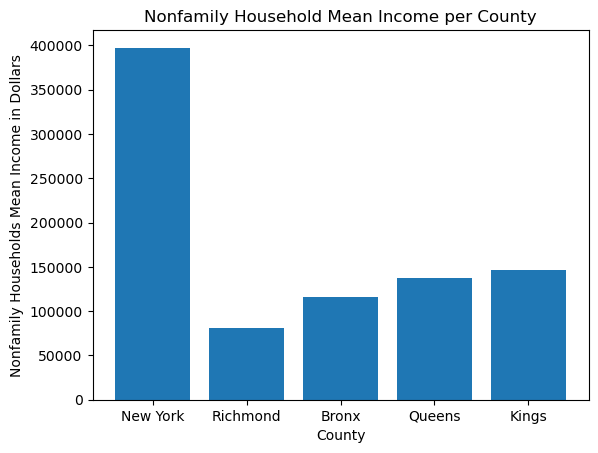

In [205]:
plt.bar(merged_df["County Name"], merged_df["Nonfamily Households Mean Income (Dollars)"])
plt.xlabel("County")
plt.ylabel("Nonfamily Households Mean Income in Dollars")
plt.title("Nonfamily Household Mean Income per County")
plt.show()